In [1]:
import numpy as np
import numpy

In [2]:
import matplotlib.pyplot as plt

In [3]:
from scipy import integrate

In [4]:
import sympy

In [5]:
sympy.init_printing()

In [6]:
t, R, r, g, sigma, delta = sympy.symbols(" t, R, r, g, sigma, delta")

In [7]:
Y, y =sympy.symbols("Y, y", cls=sympy.Function)

D:\anaconda3\lib\site-packages\sympy\core\relational.py:486: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


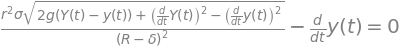

In [8]:
ode1 = sympy.Eq(sigma*r**2*sympy.sqrt(2*g*(Y(t)-y(t))+Y(t).diff(t)**2-y(t).diff(t)**2)/(R-delta)**2-y(t).diff(t))
ode1

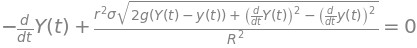

In [9]:
ode2 = sympy.Eq(sigma*r**2*sympy.sqrt(2*g*(Y(t)-y(t))+Y(t).diff(t)**2-y(t).diff(t)**2)/R**2-Y(t).diff(t))
ode2

In [10]:
f1 , f2, f3, f4 = sympy.symbols("f_1, f_2, f_3, f_4", cls=sympy.Function)
varchange = {Y(t).diff(t): f2(t).diff(t),
            Y(t): f1(t),
            y(t).diff(t): f4(t).diff(t),
            y(t): f3(t)}
ode1_vc = ode1.subs(varchange)
ode2_vc = ode2.subs(varchange)
ode3 = f1(t).diff(t) - f2(t)
ode4 = f3(t).diff(t) - f4(t)

In [19]:
f = sympy.Matrix([f1(t), f2(t), f3(t), f4(t)])
vcsol = sympy.solve((ode1_vc, ode2_vc, ode3, ode4), f.diff(t), dict=True)
f_vc = f.diff(t).subs(vcsol[0])

In [12]:
params = {R: 10.0, r:1.0, g: 9.8, sigma: 0.15, delta: 0.2}
_f_np = sympy.lambdify((t, f), f_vc.subs(params), 'numpy')

In [13]:
f_np = lambda _t, _f, *args: _f_np(_t, _f)
jac = sympy.Matrix([[fj.diff(fi) for fi in f] for fj in f_vc])

In [14]:
_jac_np = sympy.lambdify((t, f), jac.subs(params), 'numpy')
jac_np = lambda _t, _f, *args: _jac_np(_t, _f)

In [50]:
y0 = [5.0, 0, 0, 0]
tt = np.linspace(0, 200, 100)
r = integrate.ode(f_np, jac_np).set_initial_value(y0, tt[0])
dt = tt[1] - tt[0]
ff = np.zeros((len(tt), len(y0)))
idx = 0
while r.successful() and r.t < tt[-1]:
    ff[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

In [51]:
Y_np, y_np = ff[:, 0], ff[:, 2]

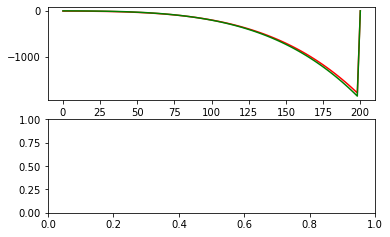

In [59]:
fig = plt.figure (figsize=(10, 10))
ax1 = plt.subplot2grid((5, 5), (0, 0), colspan = 3)
ax2 = plt.subplot2grid((5, 5), (1, 0), colspan = 3)
ax1.plot(tt, -Y_np, 'r')
ax1.plot(tt, y_np, 'g')